# Wave Propagation Method (WPM)


In Diffractio, we have implemented the WPM algorithm described in:

** TODO **

The algorithm can be applied to X, and XY schemes, and also in the propagated schemes: XZ and XYZ.

The main characteristics of the algorithm are:
- Propagation ocurrs between two parallel planes, whose distance between them is z. The results are more accurate when de distance between de planes increases. The function to perform Rayleigh-Sommerfeld approach is RS. There is a parameter which stores the quality parameter (self.quality). Also, it can be seen when invoquing to RS function. The parameter verbose, when it is True, shows the quality parameter.



Now, let us show an example of usage of Wave Propagation Method for the differente schemes:

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

import matplotlib.cm as cm


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## XZ scheme

In [2]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 1024 * 2)
wavelength = 5 * um


In [3]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)


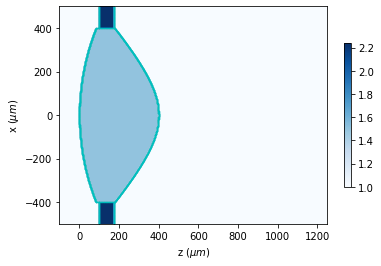

In [4]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lens.aspheric_lens(r0=(0 * mm, 0 * mm),
                                  angle=(0 * degrees, (0 * mm, 0 * mm)),
                                  refractive_index=1.5,
                                  cx=(1 / (1 * mm), -1 / (.25 * mm)),
                                  Qx=(0, 0),
                                  a2=(0, 1e-13),
                                  a3=(0, 0),
                                  a4=(0, 0),
                                  depth=.4 * mm,
                                  size=0.8 * mm)

lens.slit(r0=(0, 100 * um),
          aperture=800 * um,
          depth=75 * um,
          refractive_index=1 + 2j)

lens.draw_refractive_index(draw_borders=True,
                           min_incr=0.01,
                           colormap_kind=cm.Blues,
                           colorbar_kind='vertical')


In [5]:
lens.incident_field(u0)


In [6]:
lens.clear_field()
lens.WPM(verbose=True)
lens.normalize()


Time = 2.80 s, time/loop = 1.368 ms


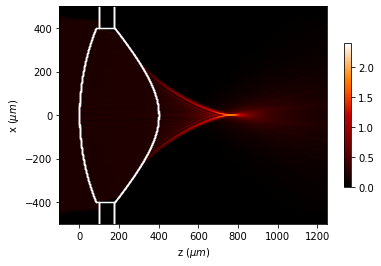

In [7]:
lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')


**Focusing area**

In [8]:
x_f_wpm, z_f_wpm = lens.search_focus()


x = -0.122 um, z = 749.438 um


In [9]:
ylim_max = 20 * um
zlim_max = 100 * um


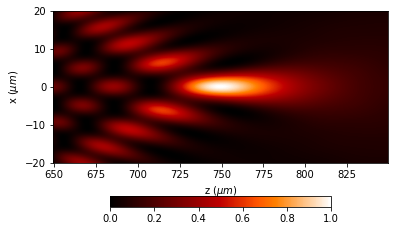

In [10]:
lens.draw(kind='intensity', colorbar_kind='horizontal')

plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)


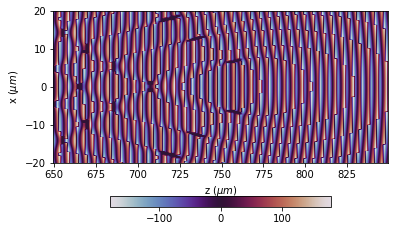

In [11]:
lens.draw(kind='phase', colorbar_kind='horizontal', percentage_intensity=0.005)

plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)
